# Data assimilation 2

Within this lecture, we continue our discussion of data assimilation. Last time, we saw how Bayesian methods can be used to 
provide a complete solution of the data assimilation problem for deterministic and finite-dimensional dynamical systems. 
The issue, however, is that the computational cost of the full method is too high to be applied directly within 
realistic applications. Our focus in this lecture is on approximate forms for the full Bayesian solution that are computationally tractable
and so can be applied to weather forecasting and other climatological applications.

### Review of the Bayesian approach

We consider a dynamical system on an $m$-dimensional state space, $\mathbb{R}^{m}$, and write 
$\mathbf{x}$ for a state vector. The dynamics is governed by an evolution equation of the form
$$
\frac{\mathrm{d}\mathbf{x}}{\mathrm{d}t} = \mathbf{f}(\mathbf{x}), 
$$
with $\mathbf{f}(\mathbf{x})$ known as the dynamical rule. Given an initial condition, 
$\mathbf{x}(0) = \mathbf{x}_{0}$, this equation has a unique solution for all times. 
We write $\Phi$ for the flow of the system, this being the mapping such that 
$\Phi(\mathbf{x}_{0},t)$ is the state at time, $t$, associated with the initial condition, $\mathbf{x}_{0}$.
For convenience we write 
$$
\Phi_{t}(\mathbf{x}_{0}) = \Phi(\mathbf{x},t)
$$
for the induced mapping on the state space at time, $t$, which 
has the inverse 
$$
\Phi_{t}^{-1}(\mathbf{x}) = \Phi(\mathbf{x},-t).
$$

Suppose that at a set of times, $t_{1}, \dots, t_{n}$, we have noisy partial observations
$$
\mathbf{y}_{i} = \mathbf{g}_{i}[\mathbf{x}(t)] + \mathbf{z}_{i}, 
$$
where the $\mathbf{g}_{i}:\mathbf{R}^{m}\rightarrow \mathbb{R}^{n_{i}}$ are observation functions that map to lower-dimensional observation spaces,
and $\mathbf{z}_{i}$ are observational errors drawn from known error distributions. Our aim is to forecast the future 
state of the system for $t > t_{n}$. 

Within the Bayesian framework, we start with a prior probability distribution, $\pi_{0}$, on the initial 
state with PDF, $p_{0}$. To construct our forecast we follow 
a  **prediction-analysis loop**:

At the $i$-th **prediction** step, we assume that our knowledge of the state at time, $t_{i-1}$, is expressed through a distribution, $\tilde{\pi}_{i-1}$. We push forward this distribution under the dynamics to obtain the prior distribution 
$$
\pi_{i} = \tilde{\pi}_{i-1} \circ \Phi_{t_{i}-t_{i-1}}^{-1}, 
$$
for the state at time, $t_{i}$. 

The $i$-th **analysis** step then applies Bayes theorem to update the prior, $\pi_{i}$, in light of the 
observations available at this time. In terms of the associated PDFs, this update takes the form
$$
\tilde{p}_{i}(\mathbf{x})  = \frac{q_{i}[\mathbf{y}_{i} - \mathbf{g}_{i}(\mathbf{x})] p_{i}(\mathbf{x})}{\int_{\mathbb{R}^{m}} q_{i}[\mathbf{y}_{i} - \mathbf{g}_{i}(\mathbf{x})] p_{i}(\mathbf{x}) \,\mathrm{d}\mathbf{x}}, 
$$
where $p_{i}$ is the prior PDF, $\tilde{p}_{i}$ the posterior PDF, and $q_{i}$ the PDF for the corresponding error distribution.

The whole process is started with a prior distribution, $\pi_{0}$, on the initial state, and once we have assimilated all  observations
we arrive at a posterior distribution, $\tilde{\pi}_{n}$, at the final observation time. Our forecast
is then found by pushing forward $\tilde{\pi}_{n}$ to later times.

We can also perform a **reanalysis** in which  $\tilde{\pi}_{n}$ is pushed back to the initial time
to arrive at a posterior distribution, $\tilde{\pi}_{0}$, on the initial state. Using $\tilde{\pi}_{0}$, 
the state of the system over the observation period can be reconstructed if desired.






## Exact methods for a class of linear problems

The aim of this section is to show that in important special case, the full Bayesian solution of the data
assimilation problem can be obtained in a simpler manner. This special case  forms the basis for the
 approximate methods discussed below. 

### The flow of a linear dynamical system

Recall that a dynamical system is linear if its evolution equation takes the form
$$
\frac{\mathrm{d}\mathbf{x}}{\mathrm{d}t} = \mathbf{A}\mathbf{x}, 
$$
with $\mathbf{A}$ a matrix that maps the state space to itself. The solution of this equation subject to 
the initial condition $\mathbf{x}(0) = \mathbf{x}_{0}$ can be written
$$
\mathbf{x}(t) = \exp(\mathbf{A}t)\mathbf{x}_{0}, 
$$
where the exponential of a matrix is defined through its Taylor expansion
$$
\exp(\mathbf{A}) = \sum_{j=0}^{\infty} \frac{1}{j!}\mathbf{A}^{j}.
$$
The validity of the above solution can be verfied by differentiating the appropriate Taylor
series term by term.  It follows that the flow of a linear dynamical system takes the form
$$
\Phi(\mathbf{x}_{0},t) = \exp( \mathbf{A} t)\mathbf{x}_{0}, 
$$
and hence the induced mapping, $\Phi_{t}$, is linear, abd corresponds to the matrix, $\exp( \mathbf{A} t)$.

### Linearisation of a dynamical system about equilibrium

While some physical systems are linear, it is more usual for linear evolution equations to arise as 
an approximation to the full dynamics. 

An **equilibrium state**, $\mathbf{x}_{0}$, of a dynamical system is defined through the condition
$$
\mathbf{f}(\mathbf{x}_{0}) = \mathbf{0}.
$$
It is clear that if a system is in an equilibrium state at time, $t=0$, then it is in this state for all other times. 
With $\mathbf{x}_{0}$ an equilibrium state, consider the initial condition, $\mathbf{x}_{0} + \Delta\mathbf{x}_{0}$, with 
the perturbation term, $ \Delta\mathbf{x}_{0}$, suitably small. At a general time, $t$, we can then write the state as
$$
\mathbf{x}(t) = \mathbf{x}_{0} + \Delta \mathbf{x}(t) + o(\|\Delta\mathbf{x}_{0}\|).
$$
Putting this expansion into the evolution equation and retaining only first-order terms we obtain
$$
\frac{\mathrm{d}\Delta \mathbf{x}}{\mathrm{d}t} =  \frac{\partial \mathbf{f}}{\partial \mathbf{x}}(\mathbf{x}_{0}) \Delta \mathbf{x}, 
$$
which is subject to the initial condition, $\Delta\mathbf{x}(0) = \Delta \mathbf{x}_{0}$. This is a linear 
dynamical system for the perturbation about the equilibrium state. For sufficiently small initial 
perturbations, the linearised system should approximate well the system's full dynamics. Recalling the definition of the sensitivity matrix from last lecture, we note that
$$
\Delta\mathbf{x}(t) = \frac{\partial \Phi_{t}}{\partial \mathbf{x}_{0}}(\mathbf{x}_{0})\Delta \mathbf{x}_{0}.
$$

### Application to the pendulum system

These ideas are readily applied to the pendulum system which has dynamical rule
$$
\mathbf{f}(\mathbf{x}) = \left(\begin{array}{c}
              \frac{1}{ml^{2}}p \\ - mgl \sin \theta
             \end{array}\right), 
$$
and hence
$$
\frac{\partial \mathbf{f}}{\partial \mathbf{x}}[\mathbf{x}(t)] = \left(\begin{array}{cc}
              0 && \frac{1}{ml^{2}} \\ - mgl \cos \theta && 0
             \end{array}\right).
$$
By inspection, an equilibrium state is
$$
\mathbf{x}_{0} = \left(\begin{array}{c}
             0 \\ 0
             \end{array}\right), 
$$
and the corresponding linearised evolution equation is
$$
\frac{\mathrm{d}}{\mathrm{d}t }\left(\begin{array}{c}
             \Delta \theta \\ \Delta p
             \end{array}\right) = \left(\begin{array}{cc}
              0 && \frac{1}{ml^{2}} \\ - mgl  && 0
             \end{array}\right) \left(\begin{array}{c}
             \Delta \theta \\ \Delta p
             \end{array}\right).
$$
Many of you will recognise this as being an instance of the equations for **simple harmonic motion**. 
For the pendulum system, there is a further equilbrium point at 
$$
\mathbf{x}_{0} = \left(\begin{array}{c}
             \pi \\ 0
             \end{array}\right). 
$$
It is clear physically that the first of these equilbrium states is stable, while the latter is not. The idea of stablility can be formalised, 
but we simply note that linearised approximations to the dynamics are only useful about a stable equilibrium. 

Within this [file](../data_assimilation/pendulum/single/physics.py) the dynamical rule for the and linearised pendulum system have been implemented, and in the code below we use then to investigate the accuracy of the linearisation for different initial perturbations. 

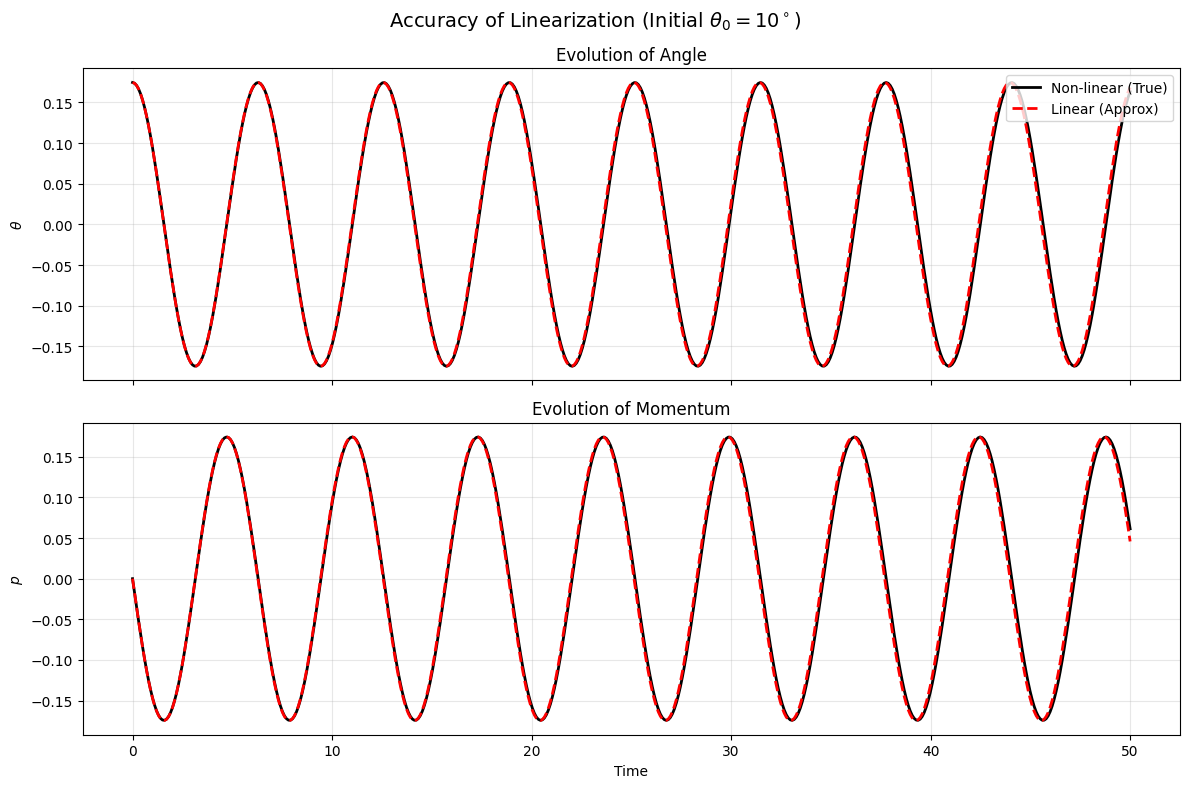

In [1]:
# Import the necessary libraries for this notebook, 
# installing pygeoinf if required. 
try:
    from pygeoinf import data_assimilation as da
except ImportError: 
    %pip install pygeoinf --quiet
    from pygeoinf import data_assimilation as da

from pygeoinf.data_assimilation.pendulum import single

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


# Setup Parameters
t_points = np.linspace(0, 50, 500)

# Set the initial perturbation
theta_0 = 10
y0 = [np.deg2rad(theta_0), 0.0] 

# True Non-linear physics
sol_nl = da.solve_trajectory(
    single.physics.eom,
    y0, 
    t_points
)

# Linearization at equilibrium
sol_l = da.solve_trajectory(
    single.physics.eom_linear, 
    y0, 
    t_points
)

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(t_points, sol_nl[0], 'k-', lw=2, label='Non-linear (True)')
ax1.plot(t_points, sol_l[0], 'r--', lw=2, label='Linear (Approx)')
ax1.set_ylabel(r"$\theta$")
ax1.set_title("Evolution of Angle")
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

ax2.plot(t_points, sol_nl[1], 'k-', lw=2, label='Non-linear (True)')
ax2.plot(t_points, sol_l[1], 'r--', lw=2, label='Linear (Approx)')
ax2.set_ylabel(r"$p$")
ax2.set_xlabel("Time")
ax2.set_title("Evolution of Momentum")
ax2.grid(True, alpha=0.3)

plt.suptitle(f'Accuracy of Linearization (Initial $\\theta_{{0}} = {theta_0}^\\circ$)', fontsize=14)
plt.tight_layout()
plt.show()


### Multivariate Gaussian distributions

A Gaussian distribution on $\mathbb{R}^{m}$ has PDF of the form
$$
p(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^{m} \det\mathbf{Q}}}
\mathrm{exp}\!\left[
    -\frac{1}{2}(\mathbf{x}-\overline{\mathbf{x}})^{T}\mathbf{Q}^{-1}(\mathbf{x}-\overline{\mathbf{x}})
    \right], 
$$
where $\overline{\mathbf{x}}$ is the **mean** value and $\mathbf{Q}$ is the **covariance**. The latter matrix needs to be symmetric and invertible
(Gaussian distributions with singular covariances can be defined but we do not need to consider this case). 

For a general PDF on $\mathbb{R}^{m}$, its **mean** is defined by 
$$
\overline{\mathbf{x}} = \int_{\mathbb{R}^{m}} \mathbf{x} \,p(\mathbf{x}) \,\mathrm{d}\mathbf{x}, 
$$
while its **covariance** is given by 
$$
\mathbf{Q} = \int_{\mathbb{R}^{m}} (\mathbf{x}-\overline{\mathbf{x}}) (\mathbf{x}-\overline{\mathbf{x}})^{T} p(\mathbf{x}) \,\mathrm{d}\mathbf{x}. 
$$
The mean and covariance calculated for a Gaussian distribution are precisely the parameters occurring within its PDF, and hence our terminology is consistent. 

In what follows, we write $\mathcal{N}(\overline{\mathbf{x}},\mathbf{Q})$ for the  Gaussian distribution with mean, $\overline{\mathbf{x}}$ and covariance, $\mathbf{Q}$.


### Push forward of a Gaussian under a linear flow

Recall from the last lecture that a distribtion $\pi$ with PDF, $p$, is transformed to 
$$
p_{t}(\mathbf{x}) = p_{0}[\Phi_{t}^{-1}(\mathbf{x})]  \det\!\left\{
    \frac{\partial \Phi_{t}}{\partial \mathbf{x}_{0}}[\Phi_{t}^{-1}(\mathbf{x})]\right\}^{-1}, 
$$
under the flow of a dynamical system. When the dynamical system is linear and 
the initial distribution is Gaussian, the push forward of the distribution is also Gaussian and there
exist simple relationships between the means and covariances. 

For a linear dynamical system, we know that $\Phi_{t}(\mathbf{x}_{0}) = \exp(\mathbf{A}t)\mathbf{x}_{0}$, and hence
$$
\frac{\partial \Phi_{t}}{\partial \mathbf{x}_{0}}[\Phi_{t}^{-1}(\mathbf{x})] = \exp(\mathbf{A} t).
$$
 Applying the general transformation formula, it follows that the Gaussian distribution, $\mathcal{N}(\overline{\mathbf{x}},\mathbf{Q})$,
 becomes 
$$
p_{t}(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^{m} \det\mathbf{Q}}}
\mathrm{exp}\!\left[
    -\frac{1}{2}(\mathrm{e}^{-\mathbf{A}t}\mathbf{x}-\overline{\mathbf{x}})^{T}\mathbf{Q}^{-1}
    (\mathrm{e}^{-\mathbf{A}t}\mathbf{x}-\overline{\mathbf{x}})
    \right]  \frac{1}{\det \exp(\mathbf{A} t)}.
$$
Through a simple rearrangement, this can be written
$$
p_{t}(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^{m} \det\mathbf{Q}_{t}}}
\mathrm{exp}\!\left[
    -\frac{1}{2}(\mathbf{x}-\overline{\mathbf{x}}_{t})^{T}\mathbf{Q}_{t}^{-1}
    (\mathbf{x}-\overline{\mathbf{x}}_{t})
    \right], 
$$
where we have defined 
$$
\overline{\mathbf{x}}_{t} = \exp(\mathbf{A} t)\overline{\mathbf{x}}, \quad 
\mathbf{Q}_{t} = \exp(\mathbf{A} t)\mathbf{Q} \exp(\mathbf{A} t)^{T}.
$$
Thus, the transformed distribution is still Gaussian, and its mean and covariance 
can be readily determined. 

The code below illustrates this idea. First, we perform the transformation of a Gaussian PDF using the general method from the last lecture, but 
applied to the linearised pendulum equations. Next, we transform the mean and covariance of the initial distribution using the above formulae. The 
two PDFs are plotted side by side and we can see that they look identical. 

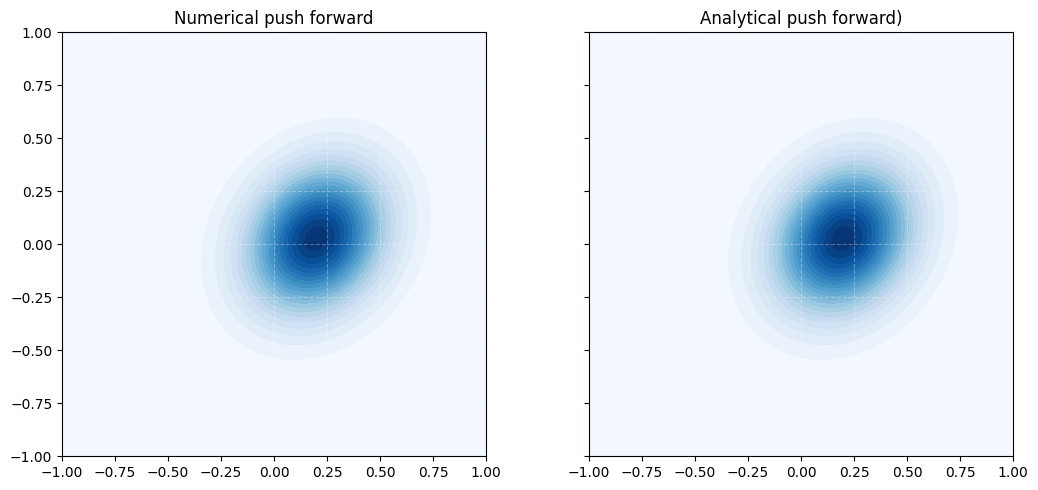

In [2]:
# Setup Parameters and Initial Correlated Prior
t = 25.0
mean_0 = np.array([0.2, 0.0]) 
cov_0 = np.array([[0.05, 0.01], [0.01, 0.05]]) 

# Create the prior on a grid
theta_range = (-np.pi, np.pi)
p_range = (-3, 3)
resolution = 300

prior_0 = da.ProbabilityGrid.from_bounds(
    (theta_range, p_range), 
    resolution, 
    da.get_gaussian_pdf(mean_0, cov_0)
)


# Push forward the prior under the linearised dynamics
prior_1 = prior_0.push_forward(single.eom_linear, t)


# Map the mean and covariance analytically
P = single.physics.get_linear_propagator(t)
mean_t = P @ mean_0 
cov_t = P @ cov_0 @ P.T 
prior_1_analytical = da.ProbabilityGrid.from_bounds(
    (theta_range, p_range), 
    resolution, 
    da.get_gaussian_pdf(mean_t, cov_t)
)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)
titles = ["Numerical push forward", "Analytical push forward)"]

priors = [prior_1, prior_1_analytical]

for prior, ax, title in zip(priors, axes, titles):    
    da.plot_grid_marginal(prior, ax=ax, cmap="Blues")
    ax.set_title(title)
    ax.grid(True, color='white', alpha=0.3, zorder=10)
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()

### Updating a Gaussian prior subject to linear observations with Gaussian noise

Suppose that our knowledge of the state, $\mathbf{x}$, is described by the Gaussian prior, 
$\mathcal{N}(\overline{\mathbf{x}},\mathbf{Q})$. We are then given a noisy partial observation 
$$
\mathbf{y} = \mathbf{G}\mathbf{x} + \mathbf{z}, 
$$
where $\mathbf{G}$ is a matrix that maps to a lower-dimensional observation space, and 
$\mathbf{z}$ is a random error with distribution $\mathcal{N}(\mathbf{0}, \mathbf{R})$;
non-zero means for the error distribution can be readily handled if required. 

Using Bayes theorem, we can then determine the posterior distribution 
for $\mathbf{x}$. In this case, the prior PDF takes the form
$$
p(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^{m} \det\mathbf{Q}}}
\mathrm{exp}\!\left[
    -\frac{1}{2}(\mathbf{x}-\overline{\mathbf{x}})^{T}\mathbf{Q}^{-1}(\mathbf{x}-\overline{\mathbf{x}})
    \right], 
$$
while the likelihood is given by
$$
q(\mathbf{y}-\mathbf{G}\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^{m} \det\mathbf{R}}}
\mathrm{exp}\!\left[
    -\frac{1}{2}(\mathbf{y}-\mathbf{G}\mathbf{x})^{T}\mathbf{R}^{-1}(\mathbf{y}-\mathbf{G}\mathbf{x})
    \right].
$$
The product of these two PDFs is clearly proportional to the exponential of a quadratic function 
of $\mathbf{x}$, with this suggesting that the posterior is also Gaussian. This is indeed true, 
and through some matrix algebra it can be shown that posterior distribution has mean
$$
\tilde{\overline{\mathbf{x}}} = \overline{\mathbf{x}} + \mathbf{Q}\mathbf{G}^{T}(\mathbf{G}\mathbf{Q}\mathbf{G}^{T} + \mathbf{R})^{-1}
(\mathbf{y} - \mathbf{G}\overline{\mathbf{x}}), 
$$
and covariance
$$
\tilde{\mathbf{Q}} = \mathbf{Q} - \mathbf{Q}\mathbf{G}^{T}(\mathbf{G}\mathbf{Q}\mathbf{G}^{T} + \mathbf{R})^{-1}
\mathbf{G}\mathbf{Q}.
$$
From the form of the posterior covariance, it can be shown that an observation always leads to a gain in 
information. 

Within the code below, we perform an analysis step for an observation of $\theta$ using the general method of the last lecture and the above analytical 
formulae for the posterior mean and covariance.

Analytical Posterior Mean: [ 0.79411765 -0.05882353]
Analytical Posterior Cov:
[[ 0.00980392 -0.00196078]
 [-0.00196078  0.28039216]]


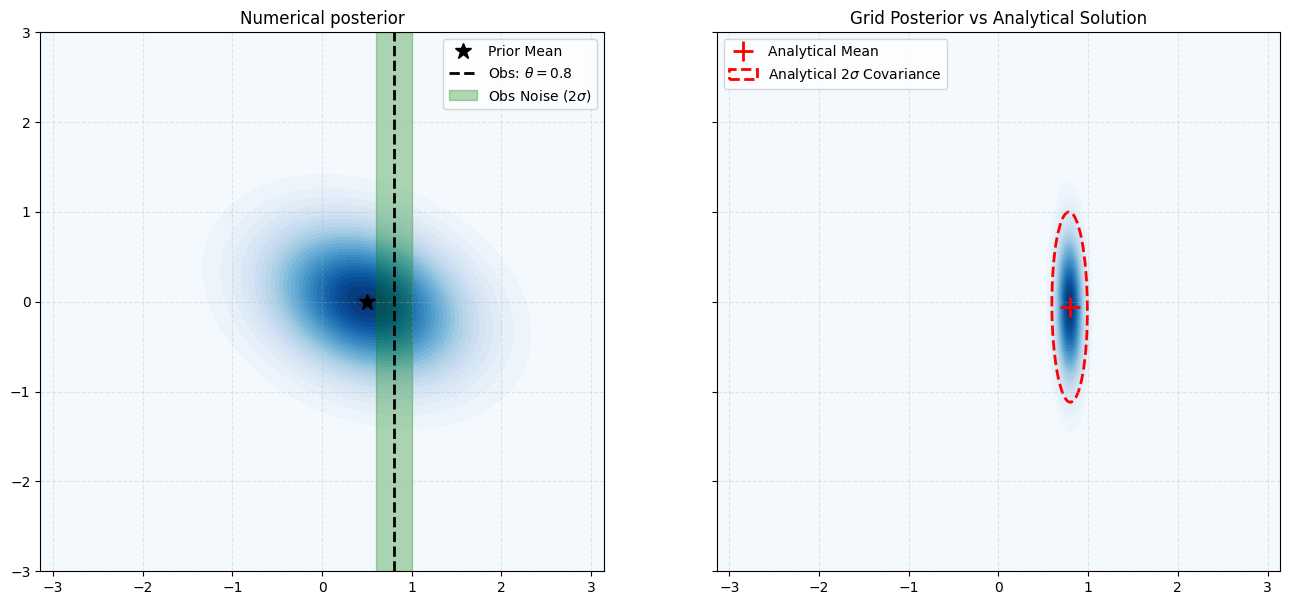

In [5]:
# Set the Gaussian prior
prior_mean = np.array([0.5, 0.0])
prior_cov  = np.array([[0.5, -0.1], 
                      [-0.1, 0.3]])

# Set the observation
y_obs = np.array([0.8])
R     = np.array([[0.01]])
G     = np.array([[1.0, 0.0]])  

# Calcuate the posterior mean and covariance
S = G @ prior_cov @ G.T + R
K = prior_cov @ G.T @ np.linalg.inv(S)    
post_mean = prior_mean + K @ (y_obs - G @ prior_mean)
post_cov = (np.eye(2) - K @ G) @ prior_cov

print(f"Analytical Posterior Mean: {post_mean}")
print(f"Analytical Posterior Cov:\n{post_cov}")

# Set the prior on a numerical grid 
prior = da.ProbabilityGrid.from_bounds(
    (theta_range, p_range), 
    resolution, 
    da.get_gaussian_pdf(prior_mean, prior_cov)
)

# Determine the likelihood
likelihood = da.LinearGaussianLikelihood(
    y_obs, 
    R, 
    G
).evaluate(prior)

# Bayesian update -- done here using a class method
posterior, _ = prior.bayes_update(likelihood)

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Plot the prior and show the observed angle
da.plot_grid_marginal(prior, ax=ax1, cmap="Blues")
ax1.set_title("Numerical posterior")
ax1.plot(prior_mean[0], prior_mean[1], 'k*', ms=12, label='Prior Mean')
ax1.axvline(
    y_obs[0], 
    color='k', 
    linestyle='--', 
    linewidth=2, 
    label=f'Obs: $\\theta={y_obs[0]}$'
)
ax1.axvspan(
    y_obs[0] - 2*np.sqrt(R[0,0]),
    y_obs[0] + 2*np.sqrt(R[0,0]), 
    color='green',
    alpha=0.3, 
    label='Obs Noise ($2\sigma$)'
)
ax1.legend(loc='upper right')


# Plot the grid posterior 
da.plot_grid_marginal(posterior, ax=ax2, cmap="Blues")
ax2.set_title("Grid Posterior vs Analytical Solution")

# Plot the analytical result as an 2-std ellipse
ax2.plot(
    post_mean[0], 
    post_mean[1], 
    'r+', 
    ms=15, 
    markeredgewidth=2, 
    label='Analytical Mean'
)
vals, vecs = np.linalg.eig(post_cov)
angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
width, height = 4 * np.sqrt(vals) 
ell = Ellipse(
    xy=post_mean, 
    width=width, 
    height=height, 
    angle=angle, 
    edgecolor='red', 
    facecolor='none', 
    linestyle='--', 
    lw=2, 
    label='Analytical 2$\sigma$ Covariance'
)
ax2.add_patch(ell)

ax2.legend(loc='upper left')
plt.show()

### The Kalman filter

We have now assembled all the tools needed to develop Bayesian data assimilation for a linear dynamical system for which the prior is Gaussian, all observations and linear, and the error distributions are also Gaussian. Given these assumptions, all posterior distributions will also be Gaussian, and so we can specify them in terms of their means and covariances alone. 

Consider the $i$-th prediction step. At the previous time, $t_{i-1}$, our knowledge of the 
system is described by a distribution, $\mathcal{N}(\tilde{\overline{\mathbf{x}}}_{i-1},\tilde{\mathbf{Q}}_{i-1})$. 
The prior distribution, $\mathcal{N}(\overline{\mathbf{x}}_{i}, \mathbf{Q}_{i})$ at time, $t_{i}$, then 
has mean 
$$
\overline{\mathbf{x}}_{i} = \mathbf{P}_{i}\tilde{\overline{\mathbf{x}}}_{i-1}
$$
and covariance
$$
\mathbf{Q}_{i} = \mathbf{P}_{i} \tilde{\mathbf{Q}}_{i-1}\mathbf{P}_{i}^{T}, 
$$
where we write $\mathbf{P}_{i} = \exp[\mathbf{A}(t_{i}-t_{i-1})]$ for convenience. 

Following this, we are given at time, $t_{i}$, the partial observation
$\mathbf{y}_{i} = \mathbf{G}_{i}\mathbf{x}_{i} + \mathbf{z}_{i}$ with error distribution
$\mathcal{N}(\mathbf{0}, \mathbf{R}_{i})$. Applying the Bayes theorem,  we compute the posterior mean
$$
\tilde{\overline{\mathbf{x}}}_{i} = \overline{\mathbf{x}}_{i} + \mathbf{K}_{i}
(\mathbf{y}_{i}-\mathbf{G}_{i}\overline{\mathbf{x}}_{i}), 
$$
and posterior covariance
$$
\tilde{\mathbf{Q}}_{i} = [\mathbf{1} - \mathbf{K}_{i}\mathbf{G}_{i}]\mathbf{Q}_{i}, 
$$
where we have defined
$$
\mathbf{K}_{i} = \mathbf{Q}_{i}\mathbf{G}_{i}^{T}(\mathbf{G}_{i}\mathbf{Q}_{i}
\mathbf{G}_{i}^{T} + \mathbf{R}_{i})^{-1}, 
$$
which is known as the **Kalman gain**.

This process starts with a prior distribution on the initial state, $\mathcal{N}(\overline{\mathbf{x}}_{0}, 
\mathbf{Q}_{0})$, and we end with a posterior distribution, $\mathcal{N}(\tilde{\overline{\mathbf{x}}}_{n}, 
\tilde{\mathbf{Q}}_{n})$ at the $n$-th observation time. Forecasts are then obtained by analytically mapping  $\mathcal{N}(\tilde{\overline{\mathbf{x}}}_{n}, 
\tilde{\mathbf{Q}}_{n})$ to later times, while reanalysis proceeds similarly if required. 

The process we have described is known as the **Kalman filter** or **KF**. This is names after Rudolf Kalman who introduced the method, though it is notable that the 
original derivation was not framed using Bayesian techniques. For linear dynamical systems, the Kalman filter provides a complete solution 
of the data assimilation problem so long as its underlying assumptions on the prior distribution and observations are met. The method can also be readily applied to linearised
dynamical systems. The results then are only approximate, but if the initial prior is sufficiently concentrated about a stable equilibrium state the results 
will be accurate. 

For a linear or linearised dynamical systems whose state space is not too large, say less than about 10000, it is possible to implement the Kalman filter directly on 
a decent laptop or desktop.  As the size of the state space increases, however, the cost of storing and updating the covariances matrices can become prohibative. Here one
option is to split the calculations in parallel over multiple processors. There also exist useful approximate methods that allow the covariance matrices to be well approximated
using low-rank factorisations that capture most of the information but require only a small fraction of the full storage cost. In the latter context, note that implementation 
of the Kalman filter does not actually require the matrix exponentials,  $\mathbf{P}_{i} = \exp[\mathbf{A}(t_{i}-t_{i-1})]$, to be calculated and stored. Indeed, the action 
of $\mathbf{P}_{i}$ on a vector simply means integrate the evolution equation over the interval $[t_{i-1},t_{i}]$  subject to given initial conditions. Similarly,  
for the action of $\mathbf{P}_{i}^{T}$ we  note the identity
$$
\exp(\mathbf{A}t)^{T} = \exp(\mathbf{A}^{T}t), 
$$
which follows immediately from the definition of the exponential of a matrix. This means that the action of $\mathbf{P}_{i}^{T}$ on a vector corresponds to 
integration of the so-called **adjoint evolution equation**
$$
\frac{\mathrm{d}\mathbf{x}}{\mathrm{d}t} = \mathbf{A}^{T}\mathbf{x}, 
$$
over $[t_{i-1},t_{i}]$. Using these ideas, it is possible to develop efficient matrix-free implementations of the Kalman filter that can be applied to very 
high-dimensional linear or linearised dynamical syetems.








## Approximate methods for non-linear problems

To conclude these lectures, we will discuss in outline two popular methods that can provide workable approximate solutions to non-linear data assimilation problems in very high-dimensional problems. Within the practicals, you will implement the second of these methods yourself. 


### The extended Kalman filter

We consider a non-linear dynamical system with evolution equation
$$
\frac{\mathrm{d}\mathbf{x}}{\mathrm{d}t} = \mathbf{f}(\mathbf{x}). 
$$
Recall that the sensitivity matrix for this system is defined through
$$
\Phi_{t}(\mathbf{x}_{0} + \Delta\mathbf{x}_{0}) - \Phi_{t}(\mathbf{x}_{0}) = \frac{\partial \Phi_{t}}{\partial\mathbf{x}_{0}}(\mathbf{x}_{0}) \Delta\mathbf{x}_{0} + o(\|\Delta \mathbf{x}_{0}\|), 
$$
and that it's value can be obtained by solution of a linear matrix ODE. The sensitivity matrix allows us to approximate the dynamics of the system for states that lie sufficiently close to a reference trajectory. 


The idea behind the **Extended Kalman filter** or  **ExKF** is to modify the prediction step within the Kalman filter to account *exactly* for the non-linear dynamics within the mean update, and approximately so for the covariance using the sensitivity matrix. The formula for the mean update is then generalised to
$$
\overline{\mathbf{x}}_{i} = \Phi_{t_{i}-t_{i-1}}(\tilde{\overline{\mathbf{x}}}_{i-1}).
$$
For the covariance we use
$$
\mathbf{Q}_{i} = \frac{\partial \Phi_{t_{i}-t_{i-1}}}{\partial\mathbf{x}_{0}}(\tilde{\overline{\mathbf{x}}}_{i-1}) \tilde{\mathbf{Q}}_{i-1} \frac{\partial \Phi_{t_{i}-t_{i-1}}}{\partial\mathbf{x}_{0}}(\tilde{\overline{\mathbf{x}}}_{i-1})^{T}.
$$
When these formulae are applied to a linear dynamical system they reduce exactly to the prediction step for the Kalman filter. Ultimately, the ExKF arises through
a Gaussian approximation of the pushed-forward distribution at each prediction step, and hence the approximation will be a good one if the the PDF at $t_{i-1}$ 
is concentrated sufficiently closely about its mean. 

The analysis step of the ExKF is identical to the KF given linear observations with Gaussian errors. At this point, more general observation operators and error distributions
might also be considered, though again the idea would again be to approximate the true posterior as a Gaussian using linearisation. 

As with the KF, a direct implementation of the ExKF is possible for systems whose dimensions are not too large. There is an added cost of having to derive and solve for the sensitivity matrix. This can be done directly, but it is also a situation in which techniques like **automatic differentiation** are often applied.

For problems in higher dimensions, the ExKF suffers from the same memory issues as the KF. But again, efficient matrix-free formulations can be developed coupled to low-rank approximations for the covariances. In particular, the **adjoint method** hinted at above can be extended to allow for the action of the transpose of the sensitivity matrix to be expressed through a single solution of a linear ordinary differential equation. 



### The ensemble Kalman filter

A downside of the ExKF is the need to develop and implement methods for computing the action of the sensitivity matrix and its transpose. While this is certainly possible, and methods like automatic differentiation help, this remains a rather involved process, and particularly for climate models whose governing equations can be extremely complicated. An alternative method is the **ensemble Kalman filter** or **EnKF**. 

In this method we begin with our prior on the initial state, $\mathcal{N}(\overline{\mathbf{x}}_{0}, \mathbf{Q}_{0})$, and draw a set of $p$ samples:
$$
\{\mathbf{x}_{0}^{1}, \dots, \mathbf{x}_{0}^{p}\}.
$$
During the first prediction step, we evolve each state within this ensemble under the exact non-linear dynamics to obtain
$$
\{\mathbf{x}_{1}^{1}, \dots, \mathbf{x}_{1}^{p}\}, 
$$
where we have set $\mathbf{x}_{1}^{k} = \bm{\Phi}_{t_{1}}(\mathbf{x}_{0}^{k})$. From this ensemble we can determine a **sample mean**
$$
\overline{x}_{1} = \frac{1}{N} \sum_{k=1}^{p}\mathbf{x}_{1}^{k}, 
$$
and the **sample covariance**
$$
\mathbf{Q}_{1} = \frac{1}{N-1} \sum_{k=1}^{p}(\mathbf{x}_{1}^{k}-\overline{\mathbf{x}}_{1})(\mathbf{x}_{1}^{k}-\overline{\mathbf{x}}_{1})^{T}.
$$
As a detail,  the factor of $N-1$ in the definition of the sample covariance is needed for this estimator to be unbiased.

If the dynamical syetem were linear, and if the number of samples in our ensemble were sufficiently great, then it can be shown that 
the sample mean and covariance tend to the true values for the underlying Gaussian distribution. In fact, even if the 
dynamics is non-linear this covergence still happens, though a general distribution cannot be fully characterised by 
these quantities alone. 

For the analysis step, suppose that we have observation $\mathbf{y}_{1} = \mathbf{G}_{1}\mathbf{x}_{1} + \mathbf{z}_{1}$ with 
error distribution, $\mathcal{N}(\mathbf{0}, \mathbf{R}_{1})$. For the $k$-th element of the ensemble, we first 
take the observed data, $\mathbf{y}_{1}$, and perturb in with a random sample from the error distribution
$$
\tilde{\mathbf{y}}_{1} = \mathbf{y}_{1} + \mathbf{z}_{1}.
$$
Having done this, the ensemble member is updated according to 
$$
\tilde{\mathbf{x}}_{1}^{k} = \mathbf{x}_{1}^{k} + \mathbf{K}_{1}(\tilde{\mathbf{y}}_{1} - \mathbf{G}_{1}\mathbf{x}_{1}^{k}), 
$$
where the Kalman gain is calculated using the sample covariance
$$
\mathbf{K}_{1} = \mathbf{Q}_{1}\mathbf{G}_{1}^{T}(\mathbf{G}_{1}\mathbf{Q}_{1}\mathbf{G}_{1}^{T}+ \mathbf{R}_{1})^{-1}.
$$
The sample mean and sample covariance can then be recalculated using the updated ensemble, $\{\tilde{\mathbf{x}}_{1}^{1}, \dots,\tilde{\mathbf{x}}_{1}^{p} \}$
to summarise our knowledge of the posterior distribution at this time. 

As before, for a linear dynamical system, it can be shown that given
enough samples, this process converges to the mean and covariance of the true posterior distribution, while for non-linear systems it 
converges to a Gaussian approximation of the true posterior. A key point within the analysis step is the addition of  random errors
to the observation when updating each member of the ensemble.  Without this step, it can be shown that uncertainties 
will be significantly underestimated. 

This prediction-analysis loop is then repeated to assimilate all available  observations. Each step just requires the integration of the 
ensemble forward in time using the exact non-linear dynamics, coupled to an analysis step that nudges the ensemble based on the 
available data. 

The great virtue of the ensemble Kalman filter is that is requires nothing more than a code for integrating the exact non-linear dynamics, while 
the memory requirements are limited to storing the $p$ members of the ensemble. Indeed, within an efficient implementation it is not necessary 
to explicitly form the sample covariance matrices directly. The larger the ensemble the better the results, but even  comparatively small ensembles can still be useful.
For example, within modern weather forecasts we have noted that the dimension of the state space might be of order $10^{9}$,  but typical ensemble sizes are only of order 10-100. 




## Further reading

These lectures can only provide an incomplete introduction to the topic of data assimilation. For those who wish to know more I recommend the following books:

- Wunsch, C., 1996. The ocean circulation inverse problem. Cambridge University Press.
- Law, K., Stuart, A. and Zygalakis, K., 2015. Data assimilation. Cham, Switzerland: Springer.
- Sanz-Alonso, D., Stuart, A. and Taeb, A., 2023. Inverse problems and data assimilation (Vol. 107). Cambridge University Press.